# kmeans

In [53]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

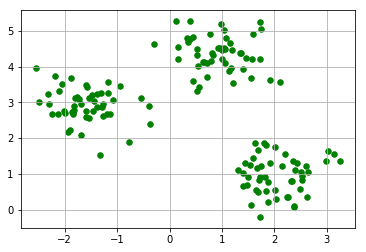

In [27]:
X,y =make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)
plt.scatter(X[:,0],X[:,1],c='green',marker='o',s=30)
plt.grid()
plt.show()

# k-means++

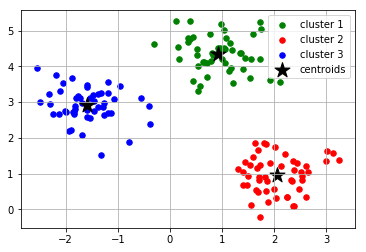

In [37]:
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=30,c='green',marker='o',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=30,c='red',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=30,c='blue',marker='o',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='black',marker='*',label='centroids')
plt.legend()
plt.grid()
plt.show()

# 肘方法

Distortion: 27.77


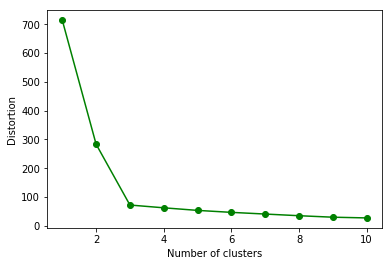

In [60]:
print('Distortion: %.2f' % km.inertia_)#已经拟合好的误差平方和
distortions=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o',c='green')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()